In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1 . Создайте объект Series, значениями которого являются целые числа от 1 до 5, а индексами символы 'a', 'b', 'c', 'd', 'e'.

In [ ]:
obj_Ser = pd.Series([1, 2, 3 , 4, 5], index=['a', 'b', 'c', 'd', 'e'])
obj_Ser


a    1
b    2
c    3
d    4
e    5
dtype: int64

1.1 С помощью обращения по явному индексу получите значение 4.


In [ ]:
obj_Ser['d']


4

#### 1.2 С помощью обращения по неявному индексу получите значение 2.


In [ ]:
obj_Ser[1]


2

#### 1.3  Добавьте в серию новый элемент.

In [ ]:
obj_Ser['f'] = 6
obj_Ser


a    1
b    2
c    3
d    4
e    5
f    6
dtype: int64

In [ ]:
# 1.4  Используя операцию среза, получите значения 3, 4, 5.

print(obj_Ser['c':'e'])


c    3
d    4
e    5
dtype: int64


#### 1.5  Создайте объект DataFrame из списка [[1, 2], [5, 3], [3.7, 4.8]] с именами столбцов col1 и col2.


In [ ]:
obj_DF = pd.DataFrame([[1, 2], [5, 3], [3.7, 4.8]], columns=['col1', 'col2'])

obj_DF


,col1,col2
0,1.0,2.0
1,5.0,3.0
2,3.7,4.8


1.6 Используя операцию индексации, получите элемент 3.7


In [ ]:
obj_DF['col1'][2]


3.7

1.7 Измените элемент 3 на 9


In [ ]:
obj_DF['col2'][1] = 9
print(obj_DF)


   col1  col2
0   1.0   2.0
1   5.0   9.0
2   3.7   4.8


1.8 Используя операцию среза, получите строки с индексами 1 и 2.


In [ ]:
obj_DF[1:4]


,col1,col2
1,5.0,9.0
2,3.7,4.8


1.9 Добавьте столбец col3, значения которого – результат поэлементного перемножения col1 и col2.


In [ ]:
obj_DF['col3'] = obj_DF['col1'] * obj_DF['col2']
obj_DF


,col1,col2,col3
0,1.0,2.0,2.00
1,5.0,9.0,45.00
2,3.7,4.8,17.76


2.1   На основе этого списка создайте датафрейм df так, чтобы каждому показателю (ru_name, en_name, class, cheer) соответствовал один столбец датафрейма. Проверьте, что последний столбец является числовым. Если нет, приведите его к типу float

In [ ]:
data = [["Вжик", "Zipper the Fly", "fly", "0.7"],
        ["Гайка", "Gadget Hackwrench", "mouse", None],
        ["Дейл", "Dale", "chipmunk", "1"],
        ["Рокфор", "Monterey Jack", "mouse", "0.8"],
        ["Чип", "Chip", "chipmunk", "0.2"]]

df = pd.DataFrame(data)
print(df)
print(df[3].dtype)

df[3] = df[3].astype(float)
print(df[3].dtype)


        0                  1         2     3
0    Вжик     Zipper the Fly       fly   0.7
1   Гайка  Gadget Hackwrench     mouse  None
2    Дейл               Dale  chipmunk     1
3  Рокфор      Monterey Jack     mouse   0.8
4     Чип               Chip  chipmunk   0.2
object
float64


2.2 Выведите число строк датафрейма df.



In [ ]:
len(df)


5

2.3  Выведите число заполненных (не NaN) ячеек в последнем столбце.


In [ ]:
df[3].count()


4

2.4  Выведите значение в ячейке, которая находится на пересечении третьей строки и второго столбца


In [ ]:
df.loc[2, 1]


'Dale'

2.5 Сохраните в переменную df1 строки датафрейма df со второй по четвертую включительно и столбцы с первого по третий включительно. Продемонстрируйте содержимое df1

In [ ]:
df1 = df.iloc[1:4, 0:3]
df1


,0,1,2
1,Гайка,Gadget Hackwrench,mouse
2,Дейл,Dale,chipmunk
3,Рокфор,Monterey Jack,mouse


2.6 Присвойте столбцам датафрейма df следующие названия: ru_name, en_name, class, cheer

In [ ]:
df.columns = ['ru_name', 'en_name', 'class', 'cheer']
df

,ru_name,en_name,class,cheer
0,Вжик,Zipper the Fly,fly,0.7
1,Гайка,Gadget Hackwrench,mouse,NaN
2,Дейл,Dale,chipmunk,1.0
3,Рокфор,Monterey Jack,mouse,0.8
4,Чип,Chip,chipmunk,0.2


2.7 Добавьте в датафрейм df столбец logcheer, который содержит логарифмированные значения cheer (если в cheer встречается NaN, то и в logcheer тоже)

In [ ]:
df['logcheer'] = np.log(df['cheer'])
print(df)

  ru_name            en_name     class  cheer  logcheer
0    Вжик     Zipper the Fly       fly    0.7 -0.356675
1   Гайка  Gadget Hackwrench     mouse    NaN       NaN
2    Дейл               Dale  chipmunk    1.0  0.000000
3  Рокфор      Monterey Jack     mouse    0.8 -0.223144
4     Чип               Chip  chipmunk    0.2 -1.609438


2.8 Сохраните массив уникальных значений столбца class в переменную x, а соответствующие им частоты (сколько раз значение встречается в столбце) — в
переменную y. Используя полученные x и y, постройте столбиковую диаграмму,
barplot, для class. Добавьте заголовок и подписи к осям

Text(0, 0.5, 'Частоты значений столбца class')

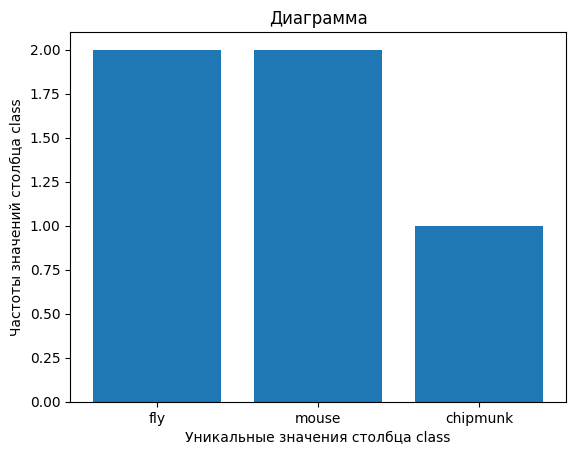

In [ ]:
x = df['class'].unique()
y = df['class'].value_counts()

plt.bar(x, y)
plt.title('Диаграмма')
plt.xlabel('Уникальные значения столбца class')
plt.ylabel('Частоты значений столбца class')

3.1 Загрузите случайную выборку из набора и далее работайте с ней:

In [ ]:
df_la = pd.read_csv('csv/la-crimes-sample.csv',delimiter=',' )
df_la

,Unnamed: 0,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,246798,100509940.0,2010-04-25,2010-04-25,1630.0,5.0,Harbor,529.0,740.0,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,740.0,NaN,NaN,NaN,CAL YACHT,MARINA SLIP D17,"(33.7753, -118.2456)"
1,1179557,151917155.0,2015-08-27,2015-08-27,430.0,19.0,Mission,1917.0,626.0,INTIMATE PARTNER - SIMPLE ASSAULT,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,626.0,NaN,NaN,NaN,14000 ASTORIA ST,NaN,"(34.312, -118.4383)"
2,1527668,172008833.0,2017-04-04,2017-04-03,1000.0,20.0,Olympic,2021.0,310.0,BURGLARY,...,NaN,IC,Invest Cont,310.0,NaN,NaN,NaN,500 LORRAINE BL,NaN,"(34.0653, -118.32)"
3,94687,101117037.0,2010-08-03,2010-08-02,2120.0,11.0,Northeast,1107.0,624.0,BATTERY - SIMPLE ASSAULT,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,624.0,NaN,NaN,NaN,1400 HEPNER AV,NaN,"(34.1318, -118.1957)"
4,1376548,161711262.0,2016-06-02,2016-06-02,1240.0,17.0,Devonshire,1764.0,210.0,ROBBERY,...,STUN GUN,IC,Invest Cont,210.0,NaN,NaN,NaN,9300 TAMPA AV,NaN,"(34.244, -118.5583)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17180,395445,110917154.0,2011-08-28,2011-08-27,1700.0,9.0,Van Nuys,911.0,330.0,BURGLARY FROM VEHICLE,...,NaN,IC,Invest Cont,330.0,NaN,NaN,NaN,6900 N SEPULVEDA BL,NaN,"(34.1958, -118.4662)"
17181,1467078,170812170.0,2017-06-30,2017-06-29,2100.0,8.0,West LA,889.0,510.0,VEHICLE - STOLEN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,2000 S HOLT AV,NaN,"(34.0412, -118.3813)"
17182,443367,111417139.0,2011-06-10,2011-06-10,830.0,14.0,Pacific,1452.0,930.0,CRIMINAL THREATS - NO WEAPON DISPLAYED,...,VERBAL THREAT,AO,Adult Other,930.0,NaN,NaN,NaN,4100 VIA DOLCE,NaN,"(33.975, -118.4593)"
17183,428482,111226996.0,2011-11-19,2011-11-18,1030.0,12.0,77th Street,1245.0,745.0,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,NaN,AO,Adult Other,745.0,NaN,NaN,NaN,1400 W 68TH ST,NaN,"(33.9778, -118.3003)"


3.2 Кол-во строк и столбцов



In [ ]:
print('кол-во строк =', df_la.shape[0])
print('кол-во столбцов =', df_la.shape[1])


кол-во строк = 17185
кол-во столбцов = 27


3.3 Названия столбцов и их типы данных

In [ ]:
df_la.columns
df_la.dtypes

Unnamed: 0                  int64
DR Number                 float64
Date Reported              object
Date Occurred              object
Time Occurred             float64
Area ID                   float64
Area Name                  object
Reporting District        float64
Crime Code                float64
Crime Code Description     object
MO Codes                   object
Victim Age                float64
Victim Sex                 object
Victim Descent             object
Premise Code              float64
Premise Description        object
Weapon Used Code          float64
Weapon Description         object
Status Code                object
Status Description         object
Crime Code 1              float64
Crime Code 2              float64
Crime Code 3              float64
Crime Code 4              float64
Address                    object
Cross Street               object
Location                   object
dtype: object

3.4 Сколько в каждом из них уникальных значений?

In [ ]:
df_la.nunique()

Unnamed: 0                17185
DR Number                 17184
Date Reported              2803
Date Occurred              2795
Time Occurred               635
Area ID                      21
Area Name                    21
Reporting District         1114
Crime Code                  107
Crime Code Description      105
MO Codes                   6768
Victim Age                   88
Victim Sex                    4
Victim Descent               14
Premise Code                165
Premise Description         152
Weapon Used Code             58
Weapon Description           58
Status Code                   5
Status Description            5
Crime Code 1                108
Crime Code 2                 49
Crime Code 3                  5
Crime Code 4                  1
Address                   11145
Cross Street               1268
Location                  11107
dtype: int64

3.5 Сколько пропущенных значений?

In [ ]:
df_la.isnull().sum()

Unnamed: 0                    0
DR Number                     1
Date Reported                 1
Date Occurred                 1
Time Occurred                 1
Area ID                       1
Area Name                     1
Reporting District            1
Crime Code                    1
Crime Code Description        6
MO Codes                   1845
Victim Age                 1398
Victim Sex                 1543
Victim Descent             1545
Premise Code                  3
Premise Description          35
Weapon Used Code          11490
Weapon Description        11490
Status Code                   1
Status Description            1
Crime Code 1                  1
Crime Code 2              16094
Crime Code 3              17171
Crime Code 4              17184
Address                       1
Cross Street              14341
Location                      1
dtype: int64

3.6 Верно ли, что женщины чаще оказываются жертвами по сравнению с мужчинами?


In [ ]:
df_la['Victim Sex'] #Проверка, какие значения вообще там присутствуют

victim_M = df_la[df_la['Victim Sex'] == 'M'].shape[0]
victim_M

victim_F = df_la[df_la['Victim Sex'] == 'F'].shape[0]
victim_F

if victim_F > victim_M:
   print('Верно. Мужчин =', victim_M, 'Женщин =', victim_F)
else:
  print('Враньё. Мужчин =', victim_M, 'Женщин =', victim_F)



Враньё. Мужчин = 8103 Женщин = 7276


3.7 Определите 10 самых распространенных преступлений в Лос-Анджелесе. Постройте график.

Text(0.5, 0, 'Частота')

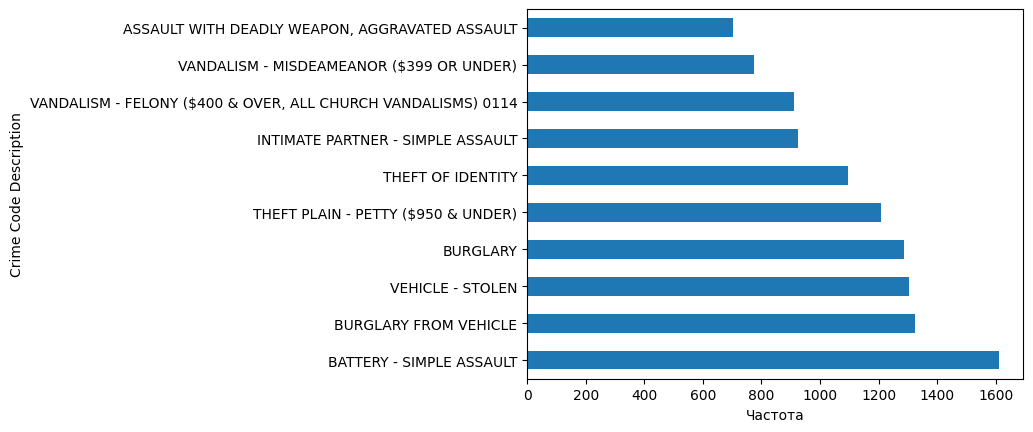

In [ ]:
top = df_la['Crime Code Description'].value_counts()[:10]

top.plot(kind='barh')
plt.ylabel('Crime Code Description')
plt.xlabel('Частота')

3.8 От каких преступлений чаще страдают женщины, а от каких мужчины?

In [ ]:
print('Преступления, от которых чаще страдают Мужчины')
victim_M = df_la[df_la['Victim Sex'] == 'M']['Crime Code Description'].value_counts().head(5)
print(victim_M)

print()

print('Преступления, от которых чаще страдают Женщины')
victim_F = df_la[df_la['Victim Sex'] == 'F']['Crime Code Description'].value_counts().head(5)
print(victim_F)


Преступления, от которых чаще страдают Мужчины
BATTERY - SIMPLE ASSAULT              779
BURGLARY FROM VEHICLE                 734
BURGLARY                              722
THEFT PLAIN - PETTY ($950 & UNDER)    661
THEFT OF IDENTITY                     538
Name: Crime Code Description, dtype: int64

Преступления, от которых чаще страдают Женщины
BATTERY - SIMPLE ASSAULT             829
INTIMATE PARTNER - SIMPLE ASSAULT    771
BURGLARY FROM VEHICLE                584
THEFT OF IDENTITY                    551
BURGLARY                             532
Name: Crime Code Description, dtype: int64


3.9 Люди какого происхождения чаще всего подвергаются преступлениям?


In [ ]:
df_la['Victim Descent']

df_la['Victim Descent'].value_counts()
# происхождения H (Hispanic/Latin/Mexican)

H    5923
W    4226
B    2790
O    1713
X     439
A     424
K      80
F      20
C      10
I       7
J       3
V       2
P       2
Z       1
Name: Victim Descent, dtype: int64

3.10 Отсортируйте районы, по количеству преступлений. Постройте график, показывающий самые безопасный и опасный районы

77th Street    1173
Southwest      1151
N Hollywood     950
Pacific         896
Southeast       879
Mission         871
Northeast       844
Van Nuys        831
Hollywood       810
Devonshire      796
Olympic         791
Harbor          775
Topanga         765
Newton          765
Central         747
West Valley     722
Hollenbeck      699
Rampart         695
West LA         682
Wilshire        682
Foothill        660
Name: Area Name, dtype: int64


Text(0.5, 0, 'Кол-во преступлений')

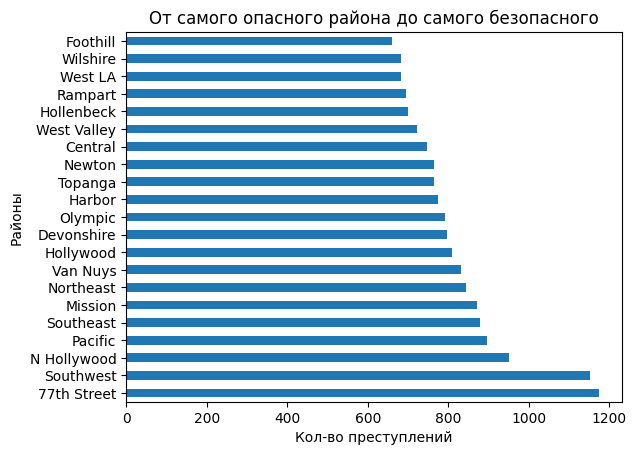

In [ ]:
print(df_la['Area Name'].value_counts())

df_la['Area Name'].value_counts().plot(kind='barh')
plt.title('От самого опасного района до самого безопасного')
plt.ylabel('Районы')
plt.xlabel('Кол-во преступлений')


4.1 Загрузите датафрейм из файла polit.csv и сохраните его в переменную polit. Если в датафрейме есть строки с пропущенными значениями, то удалите их.

In [ ]:
polit = pd.read_csv('csv/polit.csv', delimiter=',').dropna()
polit

,Unnamed: 0,ctry,fh09,polity09,gini,fparl08,mena,lati,cari,east,sovi,afri,corr0509
1,1,Albania,3.0,9.0,33.0,7.14,0,0,0,0,1,0,-0.580513
2,2,Algeria,5.5,2.0,35.3,6.48,1,0,0,0,0,0,-0.434654
5,5,Angola,5.5,-2.0,58.6,37.27,0,0,0,0,0,0,-1.292684
7,7,Argentina,2.0,8.0,48.8,39.76,0,1,0,0,0,0,-0.420793
8,8,Armenia,5.0,5.0,30.2,8.40,0,0,0,0,0,0,-0.578211
...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,206,"Venezuela, RB",4.5,-3.0,43.4,18.56,0,1,0,0,0,0,-1.061680
207,207,Vietnam,6.0,-7.0,37.8,25.76,0,0,0,1,0,0,-0.656128
210,210,"Yemen, Rep.",5.5,-2.0,37.7,0.73,1,0,0,0,0,0,-0.808840
211,211,Zambia,3.5,7.0,50.7,15.19,0,0,0,0,0,1,-0.601142


4.2 Выберите в датафрейме строки, которые соответствуют странам со значениями индекса Freedom House (fh09) выше 5.

In [ ]:
polit[polit['fh09'] > 5.0]

,Unnamed: 0,ctry,fh09,polity09,gini,fparl08,mena,lati,cari,east,sovi,afri,corr0509
2,2,Algeria,5.5,2.0,35.3,6.48,1,0,0,0,0,0,-0.434654
5,5,Angola,5.5,-2.0,58.6,37.27,0,0,0,0,0,0,-1.292684
12,12,Azerbaijan,5.5,-7.0,16.8,11.38,0,0,0,0,0,0,-1.026767
17,17,Belarus,6.5,-7.0,28.8,32.53,0,0,0,0,0,0,-0.765586
31,31,Cambodia,5.5,2.0,44.2,15.76,0,0,0,1,0,0,-1.151233
32,32,Cameroon,6.0,-4.0,44.6,13.89,0,0,0,0,0,1,-1.000362
37,37,Chad,6.5,-2.0,39.8,5.16,0,0,0,0,0,1,-1.346880
40,40,China,6.5,-7.0,41.5,21.33,0,0,0,1,0,0,-0.568752
43,43,"Congo, Dem. Rep.",6.0,5.0,44.4,7.73,0,0,0,0,0,1,-1.428074
44,44,"Congo, Rep.",5.5,-4.0,47.3,9.18,0,0,0,0,0,1,-1.113118


4.3 Выберите в датафрейме строки, которые соответствуют странам Африки (afri) с процентом женщин в парламенте (fparl08) выше 30

In [ ]:
polit[(polit['afri'] == 1) & (polit['fparl08'] > 30.0)]

,Unnamed: 0,ctry,fh09,polity09,gini,fparl08,mena,lati,cari,east,sovi,afri,corr0509
30,30,Burundi,4.5,6.0,33.3,31.74,0,0,0,0,0,1,-1.095802
133,133,Mozambique,3.5,5.0,47.1,34.80,0,0,0,0,0,1,-0.524405
160,160,Rwanda,5.5,-3.0,46.7,50.94,0,0,0,0,0,1,-0.164223
174,174,South Africa,2.0,9.0,57.8,33.92,0,0,0,0,0,1,0.332960
187,187,Tanzania,3.5,-1.0,34.6,30.41,0,0,0,0,0,1,-0.439213
198,198,Uganda,4.5,-1.0,42.6,30.72,0,0,0,0,0,1,-0.819751


4.4 Выберите в датафрейме строки, которые соответствуют странам Африки или Латинской Америки (afri и lati) со значением индекса Polity2 (polity09) больше или равным 8.

In [ ]:
polit[(polit['afri'] | polit['lati']) & (polit['polity09'] >= 8.0)]

,Unnamed: 0,ctry,fh09,polity09,gini,fparl08,mena,lati,cari,east,sovi,afri,corr0509
7,7,Argentina,2.0,8.0,48.8,39.76,0,1,0,0,0,0,-0.420793
25,25,Botswana,2.5,8.0,61.0,11.11,0,0,0,0,0,1,0.947725
26,26,Brazil,2.0,8.0,55.0,9.43,0,1,0,0,0,0,-0.119536
39,39,Chile,1.0,10.0,52.0,12.66,0,1,0,0,0,0,1.370524
42,42,Comoros,3.5,9.0,64.3,3.03,0,0,0,0,0,1,-0.709136
45,45,Costa Rica,1.0,10.0,48.9,36.84,0,1,0,0,0,0,0.483973
54,54,Dominican Republic,2.0,8.0,48.4,17.14,0,1,0,0,0,0,-0.618924
57,57,El Salvador,2.5,8.0,46.9,16.67,0,1,0,0,0,0,-0.288100
71,71,Ghana,1.5,8.0,42.8,7.89,0,0,0,0,0,1,-0.031224
77,77,Guatemala,4.0,8.0,53.7,12.03,0,1,0,0,0,0,-0.681574


4.5 Добавьте в датафрейм polit столбец corr_round, в котором будут храниться округленные до 2 знака после запятой значения индекса Control of Corruption (corr0509).

In [ ]:
polit['corr_round'] = polit['corr0509'].round(2)
polit

,Unnamed: 0,ctry,fh09,polity09,gini,fparl08,mena,lati,cari,east,sovi,afri,corr0509,corr_round
1,1,Albania,3.0,9.0,33.0,7.14,0,0,0,0,1,0,-0.580513,-0.58
2,2,Algeria,5.5,2.0,35.3,6.48,1,0,0,0,0,0,-0.434654,-0.43
5,5,Angola,5.5,-2.0,58.6,37.27,0,0,0,0,0,0,-1.292684,-1.29
7,7,Argentina,2.0,8.0,48.8,39.76,0,1,0,0,0,0,-0.420793,-0.42
8,8,Armenia,5.0,5.0,30.2,8.40,0,0,0,0,0,0,-0.578211,-0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,206,"Venezuela, RB",4.5,-3.0,43.4,18.56,0,1,0,0,0,0,-1.061680,-1.06
207,207,Vietnam,6.0,-7.0,37.8,25.76,0,0,0,1,0,0,-0.656128,-0.66
210,210,"Yemen, Rep.",5.5,-2.0,37.7,0.73,1,0,0,0,0,0,-0.808840,-0.81
211,211,Zambia,3.5,7.0,50.7,15.19,0,0,0,0,0,1,-0.601142,-0.60


4.6 Добавьте в датафрейм polit столбец fh_status, в котором будут храниться типы стран в зависимости от значения индекса Freedom House (значения free, partly free, not free).

In [ ]:
def status(fh09):
  if fh09 >= 1 and fh09 <= 2.5:
    return 'free'
  elif fh09 >= 3.0 and fh09 <= 5.0:
    return 'partly free'
  elif fh09 >=5.5 and fh09 <= 7.0:
    return 'not free'
  else:
    return 'unknown'


polit["fh_status"] = polit["fh09"].apply(status)

polit[['fh09', 'fh_status']]


,fh09,fh_status
1,3.0,partly free
2,5.5,not free
5,5.5,not free
7,2.0,free
8,5.0,partly free
...,...,...
206,4.5,partly free
207,6.0,not free
210,5.5,not free
211,3.5,partly free


4.7 Сгруппируйте строки в таблице в соответствии со значениями столбца fh_status, полученного в предыдущей части и выведите минимальное, среднее и максимальное значение показателя gini (индекс Джини) по каждой группе.

In [ ]:
polit.groupby('fh_status').agg({'gini': ['min', 'mean', 'max']})

gini                 
              min       mean   max
fh_status                         
free         24.7  38.170175  74.3
not free     16.8  39.750000  58.6
partly free  29.8  43.931250  64.3

4.8 Сгруппируйте строки в таблице в соответствии со значениями столбца fh_status и запишите строки, относящиеся к разным группам, в отдельные csv-файлы

In [ ]:
group_status = polit.groupby('fh_status')

for group, status in group_status:
  status.to_csv(f'csv/4.8/{group}.csv')

5 Используя набор данных Video Game Sales https://www.kaggle.com/gregorut/videogamesales:

In [ ]:
vgs = pd.read_csv('csv/vgsales.csv', delimiter=',')
vgs

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


5.1 Вывести все доступные платформы, на которых выпускалась хотя-бы одна игра

In [ ]:
vgs['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

###### 5.2. Добавить к копии набора данных столбец metacritic_rating и заполнить его данными из набора данных Metacritic all time games stats (https://www.kaggle.com/skateddu/metacritic-all-time-games-stats)

In [ ]:
data = pd.read_csv('csv/metacritic_games.csv', usecols=["name", "platform", "rating"])
data.rename(columns={"name": "Name", "platform": "Platform",
                     "rating": "Metacritic_rating"}, inplace=True)
# if vgs['Name'].values == data['name'].values:
#   vgs['metacritic_rating'] = data['metascore']
vgs_copy = vgs.copy()
vgs_copy = vgs_copy.merge(data)

vgs_copy

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Metacritic_rating
0,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,E
1,12,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.81,7.57,4.13,1.92,23.42,E
2,16,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82,E
3,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40,M
4,18,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81,M
...,...,...,...,...,...,...,...,...,...,...,...,...
6171,16582,PGA European Tour,N64,2000.0,Sports,Infogrames,0.01,0.00,0.00,0.00,0.01,E
6172,16585,Planet Monsters,GBA,2001.0,Action,Titus,0.01,0.00,0.00,0.00,0.01,E
6173,16587,Bust-A-Move 3000,GC,2003.0,Puzzle,Ubisoft,0.01,0.00,0.00,0.00,0.01,E
6174,16588,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,T


####5.3 Вывести список игр, рейтинг которых равен "M" и год издания не ранее 2012 года;

In [ ]:
vgs_copy2 = vgs_copy[(vgs_copy['Metacritic_rating'] == 'M') & (vgs_copy['Year'] >= 2012)]
vgs_copy2

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Metacritic_rating
3,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40,M
5,24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38,M
11,35,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.88,0.65,2.52,14.03,M
12,36,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8.25,4.30,0.07,1.12,13.73,M
20,45,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.98,M
...,...,...,...,...,...,...,...,...,...,...,...,...
6025,15766,Divinity: Original Sin,PC,2014.0,Role-Playing,Focus Home Interactive,0.00,0.02,0.00,0.00,0.02,M
6062,15926,Pillars of Eternity,PC,2014.0,Role-Playing,Paradox Interactive,0.00,0.01,0.00,0.00,0.02,M
6100,16178,Republique,PS4,2016.0,Action,Nippon Ichi Software,0.00,0.01,0.01,0.00,0.01,M
6131,16336,Chaos;Child,PS4,2015.0,Adventure,5pb,0.00,0.00,0.01,0.00,0.01,M


####5.4 Рассчитать и вывести описательные статистики для списка, полученного в предыдущем пункте;

In [ ]:
vgs_copy2.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,5635.425249,2013.252492,0.516013,0.469867,0.058140,0.158405,1.202425
std,4510.805299,1.247411,1.139091,0.954804,0.127187,0.367517,2.420555
min,17.000000,2012.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,1950.000000,2012.000000,0.050000,0.050000,0.000000,0.010000,0.150000
50%,4545.000000,2013.000000,0.160000,0.150000,0.010000,0.050000,0.430000
75%,8838.000000,2014.000000,0.460000,0.440000,0.060000,0.140000,1.060000
max,16402.000000,2016.000000,9.630000,9.270000,0.970000,4.140000,21.400000


####5.5 Вывести жанры игр с количеством игр, которые принадлежат соответствующему жанру в виде "<жанр> - <количество игр>" для всех жанров, которые содержат в своем названии не менее 3 различных гласных

In [ ]:
def count(word):
  vowels = ['a', 'o', 'e', 'i', 'u', 'y']
  count = 0
  for symbol in word.lower():
    if symbol in vowels:
      count += 1
  return count


vgs['vowel count'] = vgs['Name'].apply(count)
filter_list = vgs[vgs['vowel count'] >= 3]['Genre'].value_counts()
filter_list

Action          3171
Sports          1884
Misc            1671
Role-Playing    1456
Adventure       1239
Shooter         1210
Racing          1062
Platform         828
Simulation       822
Fighting         812
Strategy         644
Puzzle           529
Name: Genre, dtype: int64

6.1 На сайте http://aisori-m.meteo.ru/waisori/index0.xhtml можно получить информацию метеорологических наблюдений по выбранному городу. Скачайте информацию о каком-нибудь городе и выполните следующие задания. Пример того как выглядят данные для города Барнаул: https://cloud.mail.ru/public/kHoj/oHpFCipkg.
1. Загрузите данные из файла в объект DataFrame, Добавьте заголовки к столбцам: «index», «year», «month», «day», «min_t», «average_t», «max_t», «rainfall».
Расшифровка:
• index – индекс ВМО,
• year – год,
• month – месяц,
• day – день,
• min_t – минимальная температура воздуха,
• average_t – средняя температура воздуха,
• max_t – максимальная температура воздуха,
• rainfall – количество осадков.

In [ ]:
meteo_df = pd.read_csv('csv/wr88125.txt', delimiter=';',
                   names=['index', 'year', 'month', 'day',
                          'min_t', 'average_t', 'max_t', 'rainfall'])

num_cols = ["min_t", "average_t", "max_t", "rainfall"]

meteo_df[num_cols] = meteo_df[num_cols].apply(lambda x: pd.to_numeric(x.str.strip()))
meteo_df

,index,year,month,day,min_t,average_t,max_t,rainfall
0,29838,1960,1,1,-6.9,-5.4,-3.8,0.1
1,29838,1960,1,2,-14.4,-10.0,-6.7,0.5
2,29838,1960,1,3,-21.7,-19.7,-13.4,0.0
3,29838,1960,1,4,-24.9,-21.4,-16.9,0.0
4,29838,1960,1,5,-18.3,-8.0,-3.3,4.1
...,...,...,...,...,...,...,...,...
22276,29838,2020,12,27,-41.7,-36.3,-32.8,0.0
22277,29838,2020,12,28,-40.1,-34.2,-25.5,0.0
22278,29838,2020,12,29,-28.2,-23.9,-18.6,0.0
22279,29838,2020,12,30,-21.8,-13.6,-9.9,0.8


6.2 Удалите столбец index.

In [ ]:
meteo_df = meteo_df.drop(columns='index')
meteo_df

,year,month,day,min_t,average_t,max_t,rainfall
0,1960,1,1,-6.9,-5.4,-3.8,0.1
1,1960,1,2,-14.4,-10.0,-6.7,0.5
2,1960,1,3,-21.7,-19.7,-13.4,0.0
3,1960,1,4,-24.9,-21.4,-16.9,0.0
4,1960,1,5,-18.3,-8.0,-3.3,4.1
...,...,...,...,...,...,...,...
22276,2020,12,27,-41.7,-36.3,-32.8,0.0
22277,2020,12,28,-40.1,-34.2,-25.5,0.0
22278,2020,12,29,-28.2,-23.9,-18.6,0.0
22279,2020,12,30,-21.8,-13.6,-9.9,0.8


6.3 Используя метод info(), oтветьте на вопросы:

Есть ли в данных пропущенные значения?

B каком столбце данных больше всего пропущенных значений?

In [ ]:
meteo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22281 entries, 0 to 22280
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       22281 non-null  int64  
 1   month      22281 non-null  int64  
 2   day        22281 non-null  int64  
 3   min_t      22255 non-null  float64
 4   average_t  22255 non-null  float64
 5   max_t      21717 non-null  float64
 6   rainfall   22253 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 1.2 MB


Есть пропущенные и больше всего в 'max_t'

In [ ]:
meteo_df.count().idxmin()

'max_t'

6.4 В данных за какой год больше всего пропусков?

In [ ]:
year_missing = meteo_df.groupby('year')['rainfall'].apply(lambda x:
x.isnull().sum()).idxmax()

year_missing

1965

6.5 Объедините столбцы «Год», «Месяц» и «День» в один столбец «Дата» в формате
гггг-мм-дд (2000-01-20). Данные в новом столбце должны иметь формат datetime;

In [ ]:
meteo_df['Date'] = pd.to_datetime(meteo_df[['year', 'month', 'day']],
format="%Y-%m-%d")
meteo_df = meteo_df.drop(columns=["month", "day"])

meteo_df

,year,min_t,average_t,max_t,rainfall,Date
0,1960,-6.9,-5.4,-3.8,0.1,1960-01-01
1,1960,-14.4,-10.0,-6.7,0.5,1960-01-02
2,1960,-21.7,-19.7,-13.4,0.0,1960-01-03
3,1960,-24.9,-21.4,-16.9,0.0,1960-01-04
4,1960,-18.3,-8.0,-3.3,4.1,1960-01-05
...,...,...,...,...,...,...
22276,2020,-41.7,-36.3,-32.8,0.0,2020-12-27
22277,2020,-40.1,-34.2,-25.5,0.0,2020-12-28
22278,2020,-28.2,-23.9,-18.6,0.0,2020-12-29
22279,2020,-21.8,-13.6,-9.9,0.8,2020-12-30


6.6 Для каждого наблюдения рассчитайте размах температур (разность максимальной и минимальной суточных температур) и количество предшествующих ему дней без осадков (используйте циклы Python и условный оператор)

In [ ]:
meteo_df['range'] = meteo_df['max_t'] - meteo_df['min_t']
meteo_df['days_bez_rain'] = 0

for i in range(1, len(meteo_df)):
  if meteo_df.loc[i, 'rainfall'] == 0:
    meteo_df.loc[i, 'days_bez_rain'] = meteo_df.loc[i - 1, 'days_bez_rain'] + 1

meteo_df

,year,min_t,average_t,max_t,rainfall,Date,range,days_bez_rain
0,1960,-6.9,-5.4,-3.8,0.1,1960-01-01,3.1,0
1,1960,-14.4,-10.0,-6.7,0.5,1960-01-02,7.7,0
2,1960,-21.7,-19.7,-13.4,0.0,1960-01-03,8.3,1
3,1960,-24.9,-21.4,-16.9,0.0,1960-01-04,8.0,2
4,1960,-18.3,-8.0,-3.3,4.1,1960-01-05,15.0,0
...,...,...,...,...,...,...,...,...
22276,2020,-41.7,-36.3,-32.8,0.0,2020-12-27,8.9,2
22277,2020,-40.1,-34.2,-25.5,0.0,2020-12-28,14.6,3
22278,2020,-28.2,-23.9,-18.6,0.0,2020-12-29,9.6,4
22279,2020,-21.8,-13.6,-9.9,0.8,2020-12-30,11.9,0


6.7 Определите самый длинный период засухи.

In [ ]:
meteo_df['days_bez_rain'].max()


27

6.8 Для каждого года вычислите среднегодовую температуру и общее количество
осадков. Запишите результаты в объекты Series.

Какой год можно считать самым теплым? Какой самым холодным?

В какой год выпало больше всего осадков? В какой меньше всего?

In [ ]:
sredne_godovay = meteo_df.groupby('year')['average_t'].mean()
kol_vo_osadkov = meteo_df.groupby('year')['rainfall'].sum()
type(sredne_godovay)


pandas.core.series.Series

In [ ]:
print('Very hot год = ', sredne_godovay.idxmax())
print('Very cold год = ', sredne_godovay.idxmin())

print('Год где больше всего осадков = ', kol_vo_osadkov.idxmax())
print('Год где меньше всего осадков = ', kol_vo_osadkov.idxmin())

Very hot год =  2020
Very cold год =  1969
Год где больше всего осадков =  1970
Год где меньше всего осадков =  1973


6.9 Выведете наблюдения, удовлетворяющие условиям:

 Средняя температура воздуха ниже -30 (для некоторых регионов можно
использовать -10, -35 или -40).

 Средняя температура воздуха выше 27 и количество дней без осадков больше
3.

In [ ]:
print(meteo_df[meteo_df['average_t'] < -30])


       year  min_t  average_t  max_t  rainfall       Date  range  \
17     1960  -31.4      -31.2  -27.2       0.0 1960-01-18    4.2   
18     1960  -35.8      -33.2  -29.7       0.0 1960-01-19    6.1   
323    1960  -31.3      -30.1    NaN       0.8 1960-11-19    NaN   
361    1960  -34.2      -30.2    NaN       0.0 1960-12-27    NaN   
373    1961  -36.2      -34.5    NaN       0.0 1961-01-08    NaN   
...     ...    ...        ...    ...       ...        ...    ...   
21585  2019  -38.0      -32.0  -24.3       0.0 2019-02-05   13.7   
21588  2019  -38.3      -32.8  -24.8       0.0 2019-02-08   13.5   
22275  2020  -35.5      -31.6  -23.4       0.0 2020-12-26   12.1   
22276  2020  -41.7      -36.3  -32.8       0.0 2020-12-27    8.9   
22277  2020  -40.1      -34.2  -25.5       0.0 2020-12-28   14.6   

       days_bez_rain  
17                 2  
18                 3  
323                0  
361                2  
373                1  
...              ...  
21585              2  

In [ ]:
print(meteo_df[(meteo_df['average_t'] > 27) & (meteo_df['days_bez_rain'] > 3)])

       year  min_t  average_t  max_t  rainfall       Date  range  \
1270   1963   19.4       27.4   33.4       0.0 1963-06-24   14.0   
2029   1965   19.8       27.3   35.0       0.0 1965-07-22   15.2   
3471   1969   21.4       27.1   33.2       0.0 1969-07-03   11.8   
3472   1969   22.1       28.9   35.5       0.0 1969-07-04   13.4   
3473   1969   23.2       27.9   34.2       0.0 1969-07-05   11.0   
5305   1974   16.9       27.8   37.9       0.0 1974-07-11   21.0   
6381   1977   19.5       27.2   32.9       0.0 1977-06-21   13.4   
8601   1983   20.4       27.2   33.7       0.0 1983-07-20   13.3   
10395  1988   19.4       28.3   36.6       0.0 1988-06-17   17.2   
11884  1992   17.9       28.0   37.1       0.0 1992-07-15   19.2   
15563  2002   21.7       28.5   38.3       0.0 2002-08-11   16.6   

       days_bez_rain  
1270               9  
2029              10  
3471               5  
3472               6  
3473               7  
5305              19  
6381              25  